**Problem Statement :**

Spam is potentially dangerous. A big reason that it is so important for spam to be filtered is because it can contain malicious content that can spread viruses and cyber attacks. One email can very easily take down a large corporation, so businesses need the best security they can get.


my project idea is to classify the text messages into spam or not spam This would save time for the user by not worrying about spam or advertisements and be notified for an important message


###  About the dataset : .

we have two comma Seprated file which represent about label of spam or ham and anaother atribute is Text .

## Our Strategy to Spam Detection  Model

A normal  classification algorithems can be used for dectecting spam/not spam.

So we'll convert the target variable into it's vector form and then predict the label.

### importing the required libraries

In [8]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## getting the data 

In [9]:
data = pd.read_csv('SMSSpamCollection.csv', encoding = "ISO-8859-1", engine='python',header=None)

In [10]:
Second_DataSet = pd.read_csv('spam.csv', encoding = "ISO-8859-1", engine='python', header=None)

Exploratory Data Analysis

In [11]:
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.shape

(5574, 2)

In [13]:
data[0].value_counts()

ham     4827
spam     747
Name: 0, dtype: int64

In [14]:
data.isna().sum()

0    0
1    0
dtype: int64

In [15]:
cols = [0,1]
Second_DataSet = Second_DataSet[cols]

In [16]:
Second_DataSet.shape

(5573, 2)

Merging both the datasets

In [17]:
Second_DataSet.head()

,0,1
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [18]:
Second_DataSet = Second_DataSet.iloc[1:]

In [19]:
Total_DataSet =  pd.concat([data, Second_DataSet], ignore_index=True)

In [20]:
Total_DataSet.shape

(11146, 2)

Inspecting the data types, null values and No. of levels

In [21]:
def inspect_data(data) :
      return pd.DataFrame({"Data type": data.dtypes,"NUll Values": data.isnull().sum(),
                           "No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})

In [22]:
inspect_data(Total_DataSet)

,Data type,NUll Values,No of Levels,Levels
0,object,0,2,['ham' 'spam']
1,object,0,5726,"['Go until jurong point, crazy.. Available onl..."


Data Preprocessing :



In [23]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [24]:
Total_DataSet['clean_plot'] = Total_DataSet[1].apply(lambda x: clean_text(x))

In [25]:
Total_DataSet.head()

,0,1,clean_plot
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


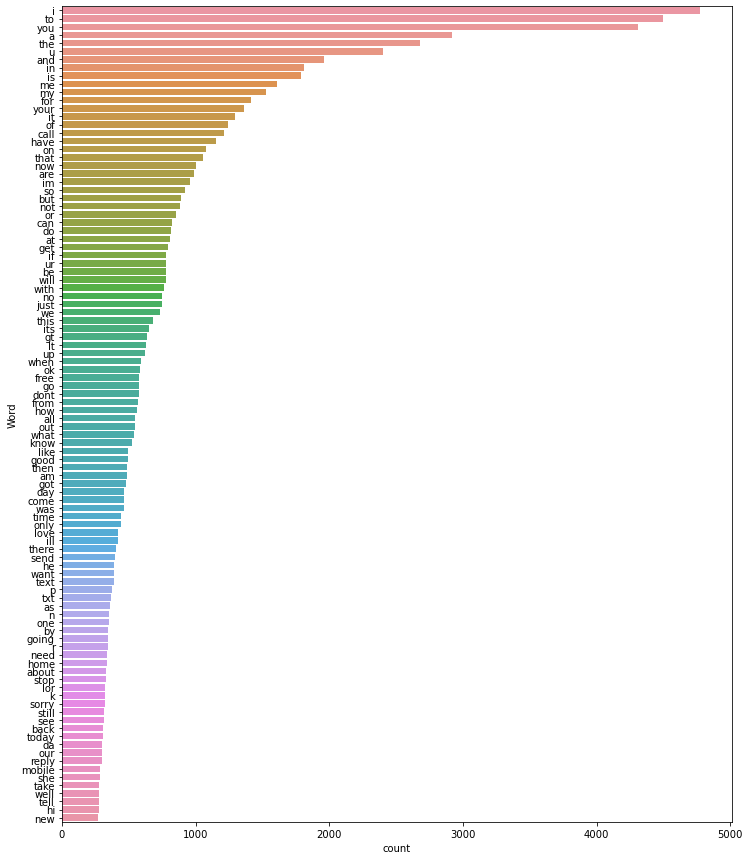

In [26]:
import nltk
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(Total_DataSet['clean_plot'], 100)

Visuals before removing stopwords 

Importing Stopwords

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramtu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

Total_DataSet['clean_plot'] = Total_DataSet['clean_plot'].apply(lambda x: remove_stopwords(x))

Visuals After Removing Stopwords

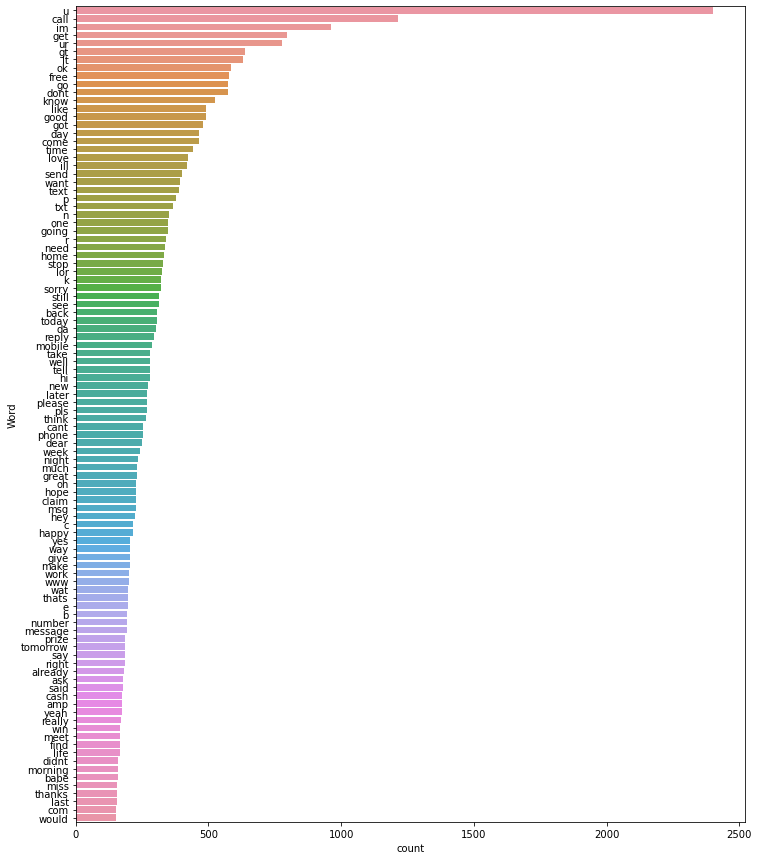

In [29]:
freq_words(Total_DataSet['clean_plot'], 100)

In [30]:
Total_DataSet['length']=Total_DataSet['clean_plot'].apply(len)
Total_DataSet.head()

,0,1,clean_plot,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,102
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,43


<AxesSubplot:ylabel='Frequency'>

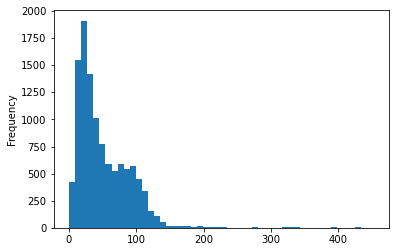

In [31]:
Total_DataSet['length'].plot(bins=50,kind='hist')

In [32]:
Total_DataSet.head()

,0,1,clean_plot,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,102
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,43


Applying tfidf_vectorizer

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
DataSet = Total_DataSet.copy()

In [34]:
DataSet.head()

,0,1,clean_plot,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,102
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,43


In [35]:
DataSet.head()

,0,1,clean_plot,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,102
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,43


In [36]:
DataSet[0].value_counts()

ham     9652
spam    1494
Name: 0, dtype: int64

In [37]:
for i in range(DataSet.shape[0]):
  if DataSet[0][i] == 'ham':
    DataSet[0][i] = 0
  else:
    DataSet[0][i] = 1

C:\Users\ramtu\AppData\Local\Temp/ipykernel_6400/908470458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet[0][i] = 0
C:\Users\ramtu\AppData\Local\Temp/ipykernel_6400/908470458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet[0][i] = 1


In [38]:
DataSet.head()

,0,1,clean_plot,length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,102
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,43


In [39]:
DataSet.dtypes

0             object
1             object
clean_plot    object
length         int64
dtype: object

In [40]:
DataSet[0] = DataSet[0].astype('int')

In [41]:
DataSet.rename(columns = {0:'target'}, inplace = True)

In [42]:
DataSet.head()

,target,1,clean_plot,length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,102
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,43


In [43]:
DataSet['clean_plot'] = DataSet['clean_plot'].astype('category')

In [44]:
DataSet.dtypes

target           int32
1               object
clean_plot    category
length           int64
dtype: object

Spliting the dataset 

In [45]:
X = DataSet['clean_plot']
y = DataSet['target']

In [46]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=9)

In [47]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [48]:
xtrain_tfidf.reshape(-1,1)

<67217724x1 sparse matrix of type '<class 'numpy.float64'>'
	with 74665 stored elements in COOrdinate format>

In [49]:

from sklearn.linear_model import LogisticRegression

# Binary Relevance
#from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

## Model Building 

1 Logistic Regression 

2 RandomForest Classifier 

3 Naive Bayes 

4 Xg Boost

5.Decision Trees

6.SVM Classifier

7.KNN Classifier

# Logistic Regression 

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(xtrain_tfidf,ytrain)

LogisticRegression()

In [52]:
y_true = ytrain
y_pred = lr.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7742
           1       0.99      0.87      0.93      1174

    accuracy                           0.98      8916
   macro avg       0.99      0.94      0.96      8916
weighted avg       0.98      0.98      0.98      8916



In [53]:
y_true = yval
y_pred = lr.predict(xval_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1910
           1       0.98      0.81      0.89       320

    accuracy                           0.97      2230
   macro avg       0.97      0.90      0.93      2230
weighted avg       0.97      0.97      0.97      2230



In [54]:
# evaluate performance
print("F1=",f1_score(y_pred, yval, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

F1= 0.9699551569506727
Precision= 0.9699551569506727
recall= 0.9699551569506727
Accuracy= 0.9699551569506727


In [55]:
from sklearn.metrics import confusion_matrix as cm
cm(y_true, y_pred)

array([[1904,    6],
       [  61,  259]], dtype=int64)

# RandomForest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf = RandomForestClassifier()
clf.fit(xtrain_tfidf,ytrain)
y_true = ytrain
y_pred = clf.predict(xtrain_tfidf)

### Classification Report on Train and test

In [58]:
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7742
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      8916
   macro avg       1.00      1.00      1.00      8916
weighted avg       1.00      1.00      1.00      8916



In [59]:
y_true = yval
y_pred = clf.predict(xval_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1910
           1       1.00      0.98      0.99       320

    accuracy                           1.00      2230
   macro avg       1.00      0.99      0.99      2230
weighted avg       1.00      1.00      1.00      2230



In [60]:
# evaluate performance
print("F1=",f1_score(y_pred, y_true, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

F1= 0.9973094170403587
Precision= 0.9973094170403587
recall= 0.9973094170403587
Accuracy= 0.9973094170403587


In [61]:
from sklearn.metrics import confusion_matrix as cm
cm(y_true, y_pred)

array([[1910,    0],
       [   6,  314]], dtype=int64)

# Naive Bayes Classifier 

In [62]:
from sklearn.naive_bayes import GaussianNB 

In [63]:
classifier = GaussianNB()

In [64]:
classifier.fit(xtrain_tfidf.toarray(),ytrain)

GaussianNB()

In [65]:
y_true = yval
y_pred = classifier.predict(xval_tfidf.toarray())

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)


In [66]:
# evaluate performance
print("F1=",f1_score(y_pred, y_true, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

F1= 0.9295964125560539
Precision= 0.9295964125560539
recall= 0.9295964125560539
Accuracy= 0.9295964125560539


In [67]:
cm(y_true, y_pred)

array([[1756,  154],
       [   3,  317]], dtype=int64)

# XG Boost Classifier

In [68]:
from xgboost.sklearn import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xg = XGBClassifier()
xg.fit(xtrain_tfidf,ytrain)
y_true = ytrain
y_pred = xg.predict(xtrain_tfidf)

Model Evaluation

In [ ]:
y_true = ytrain
y_pred = xg.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
y_true = yval
y_pred = xg.predict(xval_tfidf)
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
# Printing Confusion Matrix
cm(y_true, y_pred)

In [ ]:
DataSet.head()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier().fit(xtrain_tfidf,ytrain)

In [ ]:
y_true = ytrain
y_pred = clf.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
y_true = yval
y_pred = clf.predict(xval_tfidf)
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
# evaluate performance
print("F1=",f1_score(y_pred, y_true, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

## SVM Classifier

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=1,kernel="linear")

In [ ]:
clf.fit(xtrain_tfidf,ytrain)

In [ ]:
y_true = ytrain
y_pred = clf.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
y_true = yval
y_pred = clf.predict(xval_tfidf)
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
# evaluate performance
print("F1=",f1_score(y_pred, y_true, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(xtrain_tfidf,ytrain)

In [ ]:
clf = knn

In [ ]:
y_true = ytrain
y_pred = clf.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

In [ ]:
y_true = yval
y_pred = clf.predict(xval_tfidf)
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

##Final Report

**Metric choosen**: Recall 

**Reason**:I figured out that my most important task is not to miss any spam SMS. Hence, precision is the exact metric that I should look at.

**Best Model**: Hence, out of all the models created, decision trees had the best recall of 99% on the validation dataset and 100% on the training dataset.  




